## Data Preparation and Processing

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from random import randint
import matplotlib.pyplot as plt
import itertools

In [2]:
%matplotlib inline

About the data:   2000 students, if 30% of midterm1 + 30% of midterm2 + 40% of final >= 50: pass

### Creating the data

In [3]:
train_data = []
train_labels = []

In [4]:
for i in range(2000):
    mid1 = randint(0, 100)
    mid2 = randint(0, 100)
    final = randint(0, 100)
    train_data.append([mid1, mid2, final])
    avg = mid1*30/100 + mid2* 30/100 + final*40/100
    train_labels.append(1 if avg >= 50 else 0)

In [5]:
test_data = []
test_labels = []

In [6]:
for i in range(200):
    mid1 = randint(0, 100)
    mid2 = randint(0, 100)
    final = randint(0, 100)
    test_data.append([mid1, mid2, final])
    avg = mid1*30/100 + mid2* 30/100 + final*40/100
    test_labels.append(1 if avg >= 50 else 0)

In [7]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [8]:
train_data = train_data/100.0
test_data = test_data/100.0

In [9]:
train_data.shape, test_data.shape

((2000, 3), (200, 3))

## tf.keras Sequential Model

For the input shape,

   The number of rows in the training set is not part of the input shape of the network because the training process feeds
   the network one sample per batch (or, more precisely, batch_size samples per batch) and in input shape, the batch
   dimension is not included for the first layer 

In [10]:
model = Sequential([
    Dense(16, input_shape=(3,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
hist = model.fit(x=train_data, y=train_labels, validation_split=0.1, batch_size=10, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
180/180 - 1s - loss: 0.6786 - accuracy: 0.5272 - val_loss: 0.6831 - val_accuracy: 0.4550
Epoch 2/100
180/180 - 0s - loss: 0.6616 - accuracy: 0.5283 - val_loss: 0.6704 - val_accuracy: 0.4750
Epoch 3/100
180/180 - 0s - loss: 0.6454 - accuracy: 0.5639 - val_loss: 0.6549 - val_accuracy: 0.5400
Epoch 4/100
180/180 - 0s - loss: 0.6276 - accuracy: 0.6311 - val_loss: 0.6355 - val_accuracy: 0.6200
Epoch 5/100
180/180 - 0s - loss: 0.6063 - accuracy: 0.6961 - val_loss: 0.6115 - val_accuracy: 0.6900
Epoch 6/100
180/180 - 0s - loss: 0.5814 - accuracy: 0.7422 - val_loss: 0.5830 - val_accuracy: 0.7250
Epoch 7/100
180/180 - 0s - loss: 0.5547 - accuracy: 0.7761 - val_loss: 0.5529 - val_accuracy: 0.7550
Epoch 8/100
180/180 - 0s - loss: 0.5275 - accuracy: 0.7922 - val_loss: 0.5221 - val_accuracy: 0.7850
Epoch 9/100
180/180 - 0s - loss: 0.5004 - accuracy: 0.8039 - val_loss: 0.4902 - val_accuracy: 0.8150
Epoch 10/100
180/180 - 0s - loss: 0.4738 - accuracy: 0.8278 - val_loss: 0.4610 - val_accura

Epoch 82/100
180/180 - 0s - loss: 0.0658 - accuracy: 0.9883 - val_loss: 0.0689 - val_accuracy: 0.9800
Epoch 83/100
180/180 - 0s - loss: 0.0650 - accuracy: 0.9867 - val_loss: 0.0678 - val_accuracy: 0.9800
Epoch 84/100
180/180 - 0s - loss: 0.0644 - accuracy: 0.9878 - val_loss: 0.0679 - val_accuracy: 0.9850
Epoch 85/100
180/180 - 0s - loss: 0.0636 - accuracy: 0.9867 - val_loss: 0.0679 - val_accuracy: 0.9850
Epoch 86/100
180/180 - 0s - loss: 0.0630 - accuracy: 0.9872 - val_loss: 0.0667 - val_accuracy: 0.9850
Epoch 87/100
180/180 - 0s - loss: 0.0624 - accuracy: 0.9878 - val_loss: 0.0672 - val_accuracy: 0.9850
Epoch 88/100
180/180 - 0s - loss: 0.0617 - accuracy: 0.9889 - val_loss: 0.0664 - val_accuracy: 0.9850
Epoch 89/100
180/180 - 0s - loss: 0.0610 - accuracy: 0.9883 - val_loss: 0.0640 - val_accuracy: 0.9800
Epoch 90/100
180/180 - 0s - loss: 0.0605 - accuracy: 0.9889 - val_loss: 0.0651 - val_accuracy: 0.9850
Epoch 91/100
180/180 - 0s - loss: 0.0597 - accuracy: 0.9878 - val_loss: 0.0627 - v

In [13]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9800


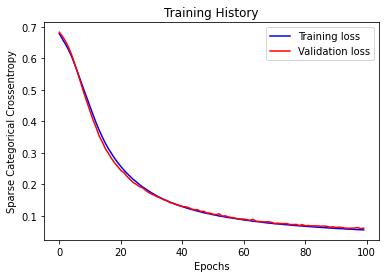

In [14]:
plt.figure()

plt.plot(range(len(hist.history['loss'])), hist.history['loss'], 'b', label='Training loss')
plt.plot(range(len(hist.history['val_loss'])), hist.history['val_loss'], 'r', label='Validation loss')
plt.title('Training History')
plt.xlabel("Epochs")
plt.ylabel("Sparse Categorical Crossentropy")
plt.legend()

plt.show()

## Predict

In [15]:
predictions = model.predict(test_data)

In [16]:
for i in range(10):
    print("Prob of fail: " + str(predictions[i][0]) + " Prob of pass: " + str(predictions[i][1]))

Prob of fail: 0.76333433 Prob of pass: 0.2366656
Prob of fail: 8.9138325e-07 Prob of pass: 0.99999917
Prob of fail: 0.8994047 Prob of pass: 0.1005953
Prob of fail: 0.99973613 Prob of pass: 0.0002638796
Prob of fail: 0.00044880388 Prob of pass: 0.9995511
Prob of fail: 0.9972836 Prob of pass: 0.002716437
Prob of fail: 0.49484903 Prob of pass: 0.5051509
Prob of fail: 0.9999987 Prob of pass: 1.3392911e-06
Prob of fail: 0.13859166 Prob of pass: 0.86140835
Prob of fail: 0.9901002 Prob of pass: 0.009899821


In [17]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [18]:
for i in range(10):
    print("Prediction: " + str(rounded_predictions[i]) + " Actual label: " + str(test_labels[i]))

Prediction: 0 Actual label: 0
Prediction: 1 Actual label: 1
Prediction: 0 Actual label: 0
Prediction: 0 Actual label: 0
Prediction: 1 Actual label: 1
Prediction: 0 Actual label: 0
Prediction: 1 Actual label: 0
Prediction: 0 Actual label: 0
Prediction: 1 Actual label: 1
Prediction: 0 Actual label: 0


## Confusion Matrix

In [19]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 92   3]
 [  1 104]]


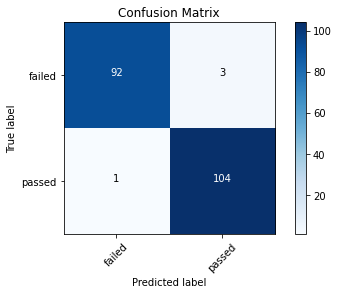

In [21]:
cm_plot_labels = ['failed','passed']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

## Saving the model

In [22]:
import os.path
if os.path.isfile("models/pass_fail_model.h5") is False:
    model.save("models/pass_fail_model.h5")